

# Project: Investigate the TMDB movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I decided to analyze the TMDB movie data. The dataset contains a variety of information about almost 10,000 different movies from the years 1960 to 2015. 

Here's the list of questions that I will explore:

<ol >
  <li>Which genre has the highest movie count? </li>
  <li>What's the relationship between popularity and revenue?</li>
  <li>How has the average runtime of movies changed over time?</li>
  <li> How do the top 5 directors with the most movies directed compare in terms of average revenue per movie?</li>
</ol>


In [1]:
# import all neccesary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First, I will take a look at the data and see if there are any things that I clearly need to fix. 

### General Properties

In [2]:
# Load the data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check the data types and see if there's any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Based on the output in the previous cells, it looks like there's a few columns that are missing data. I'm just going to drop most of those columns from the dataframe later anyways since I don't need them for my analysis. 

I also see that the budget_adj and revenue_adj columns currently display the numbers in scientific notation, so I will try to change the format of those numbers. 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



# Data Cleaning

After taking a look at the data, I will now clean the data. 

First, I will drop the columns that I won't be using from the dataframe. Then I will fix the formatting of the numbers in the budget_adj and revenue_adj columns. 

In [5]:
#drop columns that won't be used in the analysis
df.drop(['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','release_date','production_companies','vote_count','vote_average'], axis=1, inplace=True)

In [6]:
# change the numbers in the budget_adj and revenue_adj columns from scientific notation to float numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [7]:
df.sample(5)

,id,popularity,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj
8517,11543,1,Kingpin,Bobby Farrelly|Peter Farrelly,113,Comedy,1996,37535852,34787997
3166,16056,0,Winged Creatures,Rowan Woods,95,Crime|Drama,2008,0,0
10106,10264,0,Hamlet,Franco Zeffirelli,130,Drama|History,1990,0,34563641
5985,229296,0,Justin Bieber's Believe,Jon M. Chu,92,Documentary|Music,2013,0,0
7676,2728,0,Postal,Uwe Boll,100,Action|Comedy,2007,0,0


After taking a look at a few of the rows in the dataframe again, I see that the budget_adj and revenue_adj columns are now displaying the numbers in the correct format. 

The genres and directors columns have multiple values in some of the rows, so I will now work on splitting the rows. 

I followed this example that I found online to do that: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows

In [8]:
#split the directors column
directors_df = df['director'].str.split('|').apply(pd.Series, 1).stack()
genres_df= df['genres'].str.split('|').apply(pd.Series, 1).stack()


In [9]:
#get rid of the extra indices 
directors_df.index = directors_df.index.droplevel(-1)
genres_df.index = genres_df.index.droplevel(-1)


In [10]:
#give the dataframes names
directors_df.name = 'director'
genres_df.name = 'genres'


In [11]:
#drop director and genres columns so that they can be replaced by the new columns. 
df.drop(['director','genres'],axis=1, inplace=True)

In [12]:
#combine all of the dataframes together
df2=df.join(directors_df)
df_clean=df2.join(genres_df)


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29579 entries, 0 to 10865
Data columns (total 9 columns):
id                29579 non-null int64
popularity        29579 non-null float64
original_title    29579 non-null object
runtime           29579 non-null int64
release_year      29579 non-null int64
budget_adj        29579 non-null float64
revenue_adj       29579 non-null float64
director          29486 non-null object
genres            29541 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 2.3+ MB


In [14]:
df_clean.head()

,id,popularity,original_title,runtime,release_year,budget_adj,revenue_adj,director,genres
0,135397,33,Jurassic World,124,2015,137999939,1392445893,Colin Trevorrow,Action
0,135397,33,Jurassic World,124,2015,137999939,1392445893,Colin Trevorrow,Adventure
0,135397,33,Jurassic World,124,2015,137999939,1392445893,Colin Trevorrow,Science Fiction
0,135397,33,Jurassic World,124,2015,137999939,1392445893,Colin Trevorrow,Thriller
1,76341,28,Mad Max: Fury Road,120,2015,137999939,348161292,George Miller,Action


After splitting the genres and directors into separate rows, almost every movie is now showing up more than once in the table. I don't think that will really affect my analyses, so I won't make any more changes. 

<a id='eda'></a>
## Exploratory Data Analysis

First, I'll create some histograms to get a better idea of what the data looks like. 

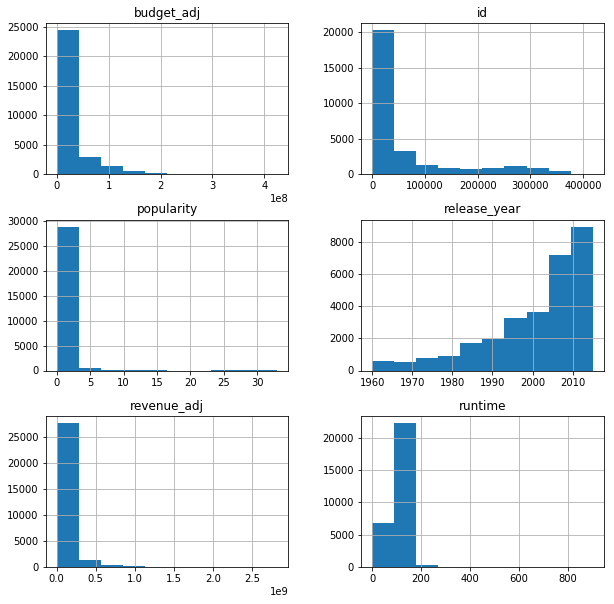

In [15]:
df_clean.hist(figsize=(10,10));

The histograms don't seem to reveal much. The main thing that I see is that the movies from the last few decades are represented the most in this dataset.

# Research Question 1: Which genre has the highest movie count?

Now I'll try and find out which genre has the highest movie count in this dataset. I'll get a count of the number of movie for each genre and then I'll plot a bar graph using those values. 

In [16]:
#get count of the genres
genre_counts = df_clean['genres'].value_counts()
genre_counts

Drama              5009
Comedy             4163
Thriller           3059
Action             2583
Horror             1864
Romance            1796
Adventure          1647
Family             1475
Crime              1402
Science Fiction    1360
Fantasy            1030
Animation           994
Mystery             838
Documentary         647
Music               461
History             363
War                 299
Foreign             203
TV Movie            175
Western             173
Name: genres, dtype: int64

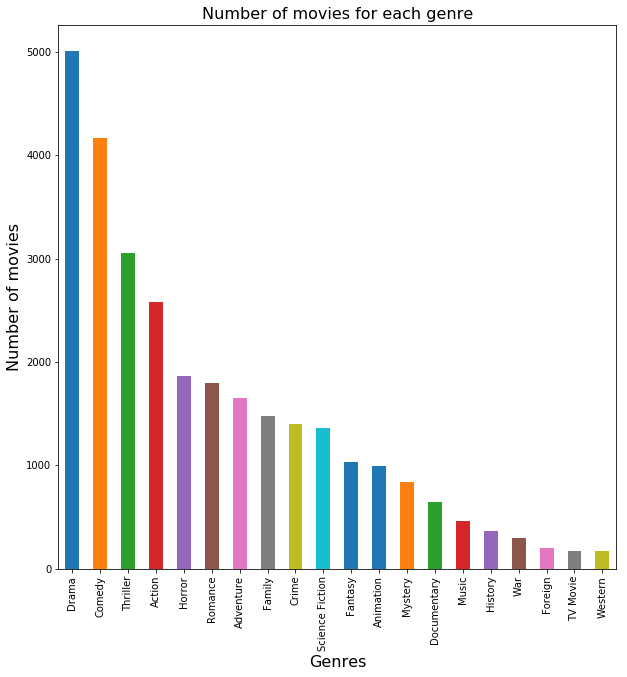

In [18]:
#plot a bar graph 
genre_counts.plot(kind='bar',figsize=(10,10))
plt.title('Number of movies for each genre', fontsize=16)
plt.xlabel('Genres',fontsize= 16)
plt.ylabel('Number of movies',fontsize= 16);

Based on this graph, the drama genre is clearly the most common genre in this dataset. It has a significant lead over the comedy genre. The Western genre is the least common genre found in this dataset.

# Research Question 2: What's the relationship between popularity and revenue?

To better understand the relationship between popularity and revenue, I will first create a dataframe that doesn't include the 0's in the revenue_adj column. I want to see if there's any noticeable difference between the two dataframes when I graph the data. 

In [19]:
# create dataframe that filters out the 0's in the revenue_adj column. 
df_no_zero = df_clean.query('revenue_adj != 0')

Now I'll create a scatterplot comparing popularity and revenue using the dataframe that doesn't have any 0's in the revenue_adj column. 

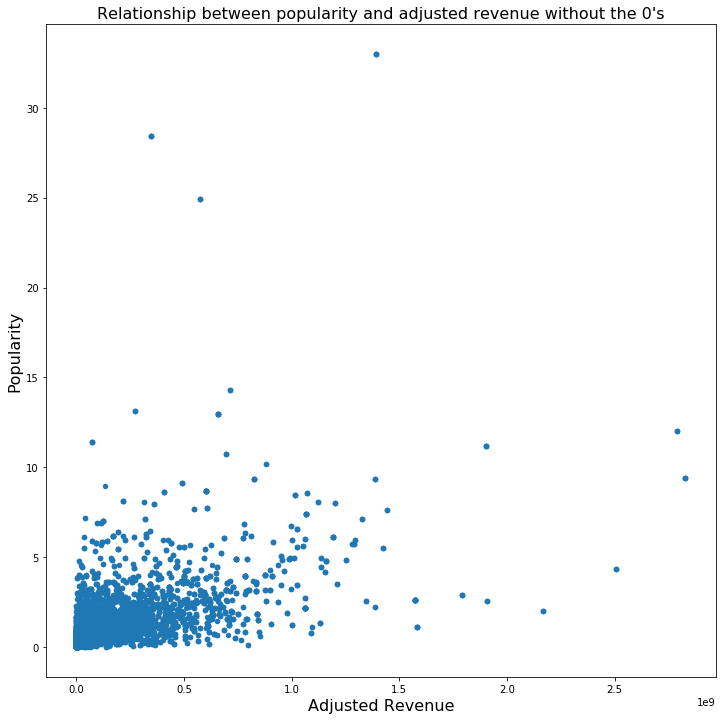

In [20]:
#create scatterplot using the dataframe that doesn't contain 0's in the revenue_adj column. 
df_no_zero.plot(x='revenue_adj', y='popularity', kind='scatter',figsize=(12,12));
plt.title('Relationship between popularity and adjusted revenue without the 0\'s', fontsize=16)
plt.xlabel('Adjusted Revenue',fontsize= 16)
plt.ylabel('Popularity',fontsize= 16);

Now I'll create another scatterplot comparing popularity and revenue using the original dataframe that contains 0's in the revenue_adj column. 

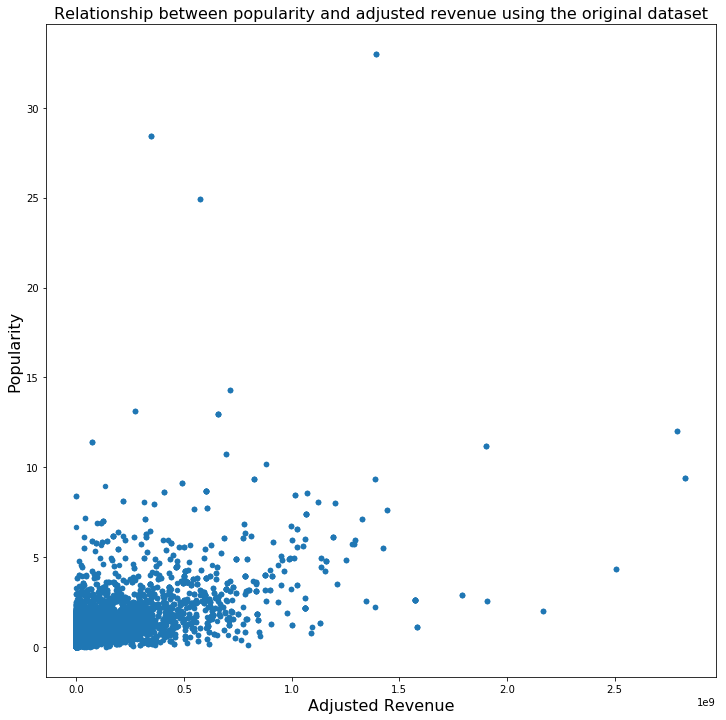

In [21]:
#create scatterplot using the original dataframe that contains 0's in the revenue_adj column. 
df_clean.plot(x='revenue_adj', y='popularity', kind='scatter', figsize=(12,12));
plt.title('Relationship between popularity and adjusted revenue using the original dataset', fontsize=16)
plt.xlabel('Adjusted Revenue',fontsize= 16)
plt.ylabel('Popularity',fontsize= 16);

Surprisingly, it seems like getting rid of the 0's in the revenue_adj column didn't make a real difference. It looks like the two graphs are pretty much the same. 

Based on these graphs, there doesn't seem to be a strong correlation between popularity and adjusted revenue. There's also a large cluster of movies that have very low popularity and very low adjusted revenue. 

# Research Question 3: How has the average runtime of movies changed over time?

First, I'll do a groupby to get the average runtime for movies in each year and then I'll plot a bar graph using that data

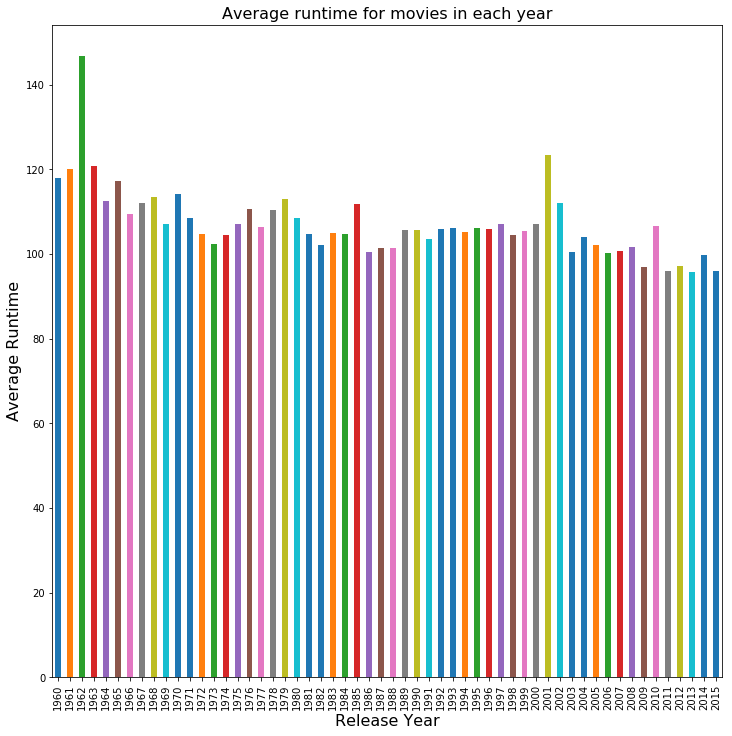

In [22]:
#Group the movies by release year and then take the average runtime
average_runtime=df_clean.groupby('release_year')['runtime'].mean()

#Create a graph using the data
average_runtime.plot(kind='bar',figsize=(12,12));
plt.title('Average runtime for movies in each year', fontsize=16)
plt.xlabel('Release Year',fontsize= 16)
plt.ylabel('Average Runtime',fontsize= 16);

It looks like the average runtime for movies was highest in 1962. Then the average runtime goes up and down each year without a clear pattern. 

# Research Question 4 : How do the top 5 directors with the most movies directed compare in terms of average revenue per movie?

First, I'll find the names of the top 5 directors with the most movies directed. Then I'll create a new dataframe that only contains the movies directed by those top 5 directors.

I'll find the average revenue per movie for each director and then I'll plot a bar graph using that data.

In [23]:
# create empty list to fill with the names of the top 5 directors
directors=[]

#get the count of the directors and take names of the top 5
top_directors=df_clean.director.value_counts().index[0:5]

#Add the names of the directors to the list
for director in top_directors:
    directors.append(director)

#check the list    
directors    

['Woody Allen',
 'Clint Eastwood',
 'Steven Spielberg',
 'Ridley Scott',
 'Martin Scorsese']

In [24]:
#Get a new dataframe that only contains movies directed by one of the top directors
df_directors= df_clean[df_clean['director'].isin(directors)]
df_directors.sample(5)

,id,popularity,original_title,runtime,release_year,budget_adj,revenue_adj,director,genres
8661,98,4,Gladiator,155,2000,130428088,579506464,Ridley Scott,Action
9817,11686,0,Love and Death,85,1975,0,0,Woody Allen,History
9770,5121,0,The Sugarland Express,110,1974,13266852,56605234,Steven Spielberg,Action
10490,11873,1,The Color of Money,119,1986,27453808,104033983,Martin Scorsese,Drama
1348,19067,0,The Duellists,100,1977,3238003,0,Ridley Scott,War


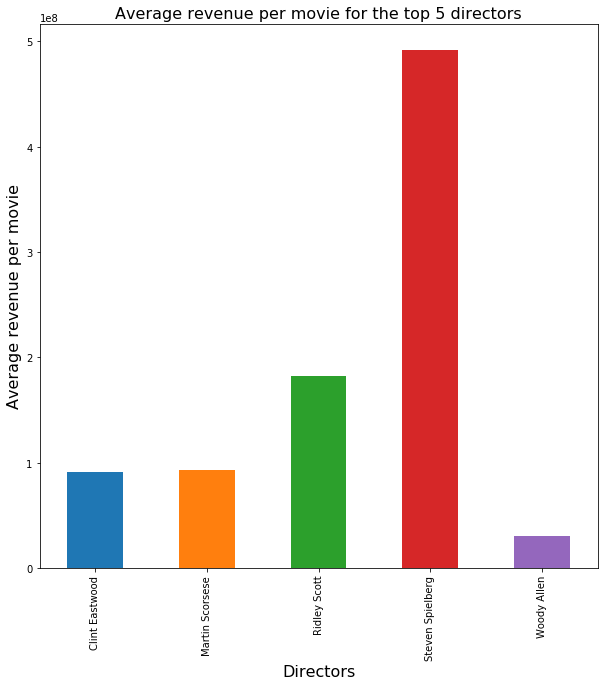

In [25]:
#Group the dataframe by director and then find the average mean
director_mean=df_directors.groupby('director')['revenue_adj'].mean()

# Plot a bar graph using the data
director_mean.plot(kind='bar',figsize=(10,10));
plt.title('Average revenue per movie for the top 5 directors', fontsize=16)
plt.xlabel('Directors',fontsize= 16)
plt.ylabel('Average revenue per movie',fontsize= 16);

This graph clearly shows that Steven Spielberg has the highest average revenue per movie by a very large margin. I already knew that Steven Spielberg is one of the most popular and successful directors of all-time, but I didn't realize how much better his movies performed at the box office in terms of average revenue per movie compared to other top directors. 

<a id='conclusions'></a>
# Conclusions


After analyzing the data, I found out a few things. 

First of all, the most common movie genre that's been produced is the drama genre. The comedy genre is the 2nd most common, but there's a significant gap between the two genres. 

I also found out that there's no clear correlation between the popularity and the adjusted revenue of the movies. Removing the 0's from the adjusted revenue column also didn't seem to make a difference for the graphs. I was expecting to see at least a small difference in the graphs, but that just ended up not happening. 

There also doesn't seem to be a clear trend for the average runtimes for the movies in the dataset. 

Finally, I found out that Steven Spielberg's average revenue per movie directed is a lot higher than the numbers for directors with a similar amount of movies directed. The difference is very sigificant and I was very surprised when I saw the graph. 